<div style="background: #000;
            color: #FFF;
            margin: 0px;
            padding: 10px 0px 20px 0px;
            text-align: center; 
                ">
    <h1 >Week 20 Lab</h1>
</div>

# Part 1

For part one, we're going to be using the following code:

(reference week-19 for help with this)

In [1]:
# our sql script

import sqlite3
from contextlib import closing

db = '../datasets/week-20-lab.db'

def connection(db_name=None):
    conn = None
    try:
        db_name = db_name or ':memory:'
        conn = sqlite3.connect(db_name)
        return conn
    except Exception as e:
        print(e)

def execute(db, cmd, commit=False):
    with closing(connection(db)) as conn:
        with closing(conn.cursor()) as cursor:
            try:
                cur = cursor.execute(cmd).fetchall()
                if commit:
                    conn.commit()
                else:
                    return cur
            except Exception as e:
                print(e)    
                
def get_tables(db):
    rows = execute(db, "SELECT name from sqlite_master where type='table';")
    return [i[0] for i in rows]

def get_cols(db, table):
    return execute(db, f"pragma table_info({table});")

a. Create a table called 'students' with the following columns:
* first_name (string)
* last_name (string)
* course (string)

In [2]:
execute(db, 'DROP TABLE students')

[]

In [3]:
execute(db, 'CREATE TABLE IF NOT EXISTS students (id INTEGER PRIMARY KEY AUTOINCREMENT, first_name text NOT NULL, last_name text NOT NULL, course text)')

[]

In [4]:
get_cols(db, 'students')

[(0, 'id', 'INTEGER', 0, None, 1),
 (1, 'first_name', 'text', 1, None, 0),
 (2, 'last_name', 'text', 1, None, 0),
 (3, 'course', 'text', 0, None, 0)]

b. Add 30 students to your table. 15 of them taking the course 'progressive web' and 15 taking 'data science'. 

In [5]:
names = ['Tim,Forsyth',
'Sophie,Churchill',
'Heather,Hardacre',
'Owen,Jackson',
'Lily,Ball',
'Ian,Lee',
'Max,Ferguson',
'Jonathan,Hughes',
'Jane,Stewart',
'Donna,Churchill',
'Virginia,Langdon',
'Richard,Cornish',
'Pippa,Lewis',
'Sue,Davies',
'Carolyn,Quinn',
'Yvonne,Parr',
'Victor,Young',
'Sophie,Taylor',
'Justin,Ince',
'Dan,Rees',
'Isaac,Davidson',
'Cameron,Howard',
'Samantha,Vaughan',
'Zoe,Newman',
'Claire,Ferguson',
'Joanne,McDonald',
'Vanessa,Pullman',
'Diane,Ferguson',
'Molly,Nash',
'Andrew,Dowd']
course = ['progressive web','data science']

In [6]:
student_rows = []

for n in range(len(names)):
    if n % 2 == 0:
        student_rows.append((names[n].split(',')[0],names[n].split(',')[1],course[0]))
    else:
        student_rows.append((names[n].split(',')[0],names[n].split(',')[1],course[1]))

In [7]:
for s in student_rows:
    execute(db, 'INSERT INTO students (first_name, last_name, course) VALUES '+str(s)+';', True)

In [8]:
execute(db,'SELECT * FROM students')

[(1, 'Tim', 'Forsyth', 'progressive web'),
 (2, 'Sophie', 'Churchill', 'data science'),
 (3, 'Heather', 'Hardacre', 'progressive web'),
 (4, 'Owen', 'Jackson', 'data science'),
 (5, 'Lily', 'Ball', 'progressive web'),
 (6, 'Ian', 'Lee', 'data science'),
 (7, 'Max', 'Ferguson', 'progressive web'),
 (8, 'Jonathan', 'Hughes', 'data science'),
 (9, 'Jane', 'Stewart', 'progressive web'),
 (10, 'Donna', 'Churchill', 'data science'),
 (11, 'Virginia', 'Langdon', 'progressive web'),
 (12, 'Richard', 'Cornish', 'data science'),
 (13, 'Pippa', 'Lewis', 'progressive web'),
 (14, 'Sue', 'Davies', 'data science'),
 (15, 'Carolyn', 'Quinn', 'progressive web'),
 (16, 'Yvonne', 'Parr', 'data science'),
 (17, 'Victor', 'Young', 'progressive web'),
 (18, 'Sophie', 'Taylor', 'data science'),
 (19, 'Justin', 'Ince', 'progressive web'),
 (20, 'Dan', 'Rees', 'data science'),
 (21, 'Isaac', 'Davidson', 'progressive web'),
 (22, 'Cameron', 'Howard', 'data science'),
 (23, 'Samantha', 'Vaughan', 'progressive w

c. One of the students from the data science course got hired! Show the SQL command that will remove this student from the table and then remove them. 

In [9]:
execute(db, 'DELETE FROM students WHERE id = 30', True)

d. Two students named Bill Gates and Elon Musk tested into phase 2 for progressive web. Write the SQL command that will add them to the table and then add them.

In [10]:
# Bill Gates and Elon Musk tested into phase 2 for progressive web. 
execute(db, "INSERT INTO students (first_name, last_name, course) VALUES ('Bill', 'Gates', 'progressive web'), ('Elon', 'Musk', 'progressive web');", True)

e. Elon Musk would like to go by a new name: 'XÆ Dogecoin-12'. Show the SQL command that would change his name and then run it. 

In [11]:
execute(db, "UPDATE students SET first_name='XÆ', last_name='Dogecoin-12' WHERE first_name='Elon'", True)

f. Show the command that would allow us to see only the students who are part of the course `data science`.

In [12]:
execute(db,'SELECT * FROM students WHERE course="data science"')

[(2, 'Sophie', 'Churchill', 'data science'),
 (4, 'Owen', 'Jackson', 'data science'),
 (6, 'Ian', 'Lee', 'data science'),
 (8, 'Jonathan', 'Hughes', 'data science'),
 (10, 'Donna', 'Churchill', 'data science'),
 (12, 'Richard', 'Cornish', 'data science'),
 (14, 'Sue', 'Davies', 'data science'),
 (16, 'Yvonne', 'Parr', 'data science'),
 (18, 'Sophie', 'Taylor', 'data science'),
 (20, 'Dan', 'Rees', 'data science'),
 (22, 'Cameron', 'Howard', 'data science'),
 (24, 'Zoe', 'Newman', 'data science'),
 (26, 'Joanne', 'McDonald', 'data science'),
 (28, 'Diane', 'Ferguson', 'data science')]

# Part 2

The following section uses the `unknown.csv` dataset located in `../datasets/`

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

%matplotlib inline

a. Import and analyze the dataset. Make sure you do the following:

* read the csv file in as a `df`.

In [14]:
df = pd.read_csv('../datasets/unknown.csv')
df

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864
...,...,...
295,71,68.545888
296,46,47.334876
297,55,54.090637
298,62,63.297171


* output the top of the `df`.

In [15]:
df.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


* output the columns.

In [16]:
df.columns

Index(['x', 'y'], dtype='object')

* show the shape of the `df`

In [17]:
df.shape

(300, 2)

* show the info.

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       300 non-null    int64  
 1   y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


* check if we're missing any data and handle it.

In [19]:
df.isna().fillna(0)

,x,y
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
295,False,False
296,False,False
297,False,False
298,False,False


* chart the data so we can visualize any relationships

<AxesSubplot:xlabel='x'>

<Figure size 432x288 with 0 Axes>

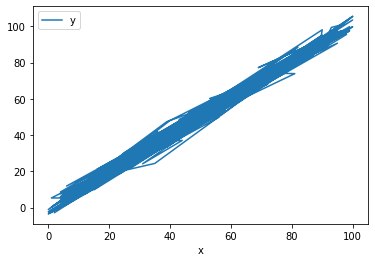

In [20]:
plt.figure()
# df.plot()
df.plot(x="x", y="y")

* show the covariance and correlation matrixes (including heatmap if you'd like).

In [21]:
msk = np.random.rand(len(df)) < 0.8
train_df = df[msk]
test_df = df[~msk]

print(len(train_df))
print(len(test_df))

x = train_df['x'].values
y = train_df['y'].values

257
43


In [22]:
def mean(values):
    return np.mean(values)

In [23]:
mean_X, mean_Y = mean(x), mean(y)
print(mean_X, mean_Y)

50.19455252918288 50.397445257249025


In [24]:
# covariance and correlation matrixes

In [25]:
def covariance(x, mean_x, y, mean_y):
    covar = 0.0
    for i in range(len(x)):
        covar += (x[i] - mean_x)*(y[i] - mean_y)
    return covar

In [26]:
covariance(x, mean_X, y, mean_Y)

210412.86653265965

<AxesSubplot:>

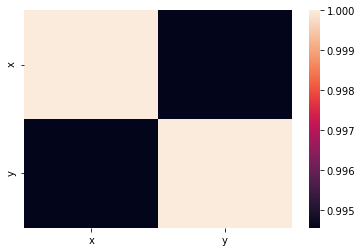

In [27]:
# heatmap
sns.heatmap(df.corr())

b. Train a linear regression model using week-20-class-2 as reference. We'd like to predict column `y`.

Make sure to do the following:
* Separate values into `X` and `Y` variables.

In [28]:
x = df['x']
y = df['y']

* Generate training and test data for `X` and `Y` using `train_test_split` (with a test size of 20%)

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [30]:
y_train.values.reshape(-1,1)

array([[ 14.82248589],
       [ 52.05490703],
       [ 68.16724757],
       [ 12.11219941],
       [ 96.58888601],
       [ 96.11982476],
       [ 95.14907176],
       [ 58.61466887],
       [ 47.49374765],
       [ 89.899991  ],
       [ 10.34754461],
       [ 95.58017185],
       [ 91.69240746],
       [ 54.08170635],
       [ 26.59112396],
       [ 68.11367147],
       [ 10.80462727],
       [ 12.07991648],
       [ 11.89457829],
       [ 17.76197116],
       [ 19.1315097 ],
       [ 41.46923883],
       [ 55.37049953],
       [ 36.11334779],
       [ 78.79008525],
       [ 39.31485292],
       [ 50.17008622],
       [ 46.69013968],
       [ 34.58876491],
       [ 92.88772282],
       [ 97.13832018],
       [ 27.42497237],
       [  0.67607675],
       [ 33.37834391],
       [ 95.3958003 ],
       [ 15.49301141],
       [ 46.91387709],
       [  7.64652976],
       [ 95.79747345],
       [  5.40522052],
       [ 60.91792707],
       [ 37.08457698],
       [ 13.12109842],
       [ 61

* Create an instance of the `LinearRegression` class and run the regression.

In [31]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train.values.reshape(-1,1), y_train.values.reshape(-1,1))
print(reg.intercept_)

[-0.35598099]


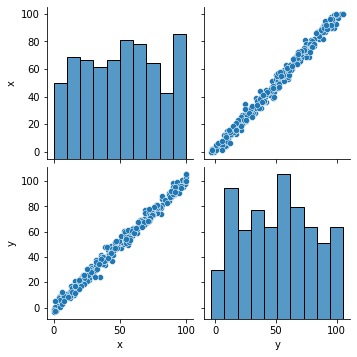

In [32]:
sns.pairplot(df)

* Output the score of the regression.

In [33]:
print(df.corr())

          x         y
x  1.000000  0.994545
y  0.994545  1.000000


In [34]:
print(reg.coef_)

[[1.0134227]]


* Chart the data.

<AxesSubplot:xlabel='x', ylabel='y'>

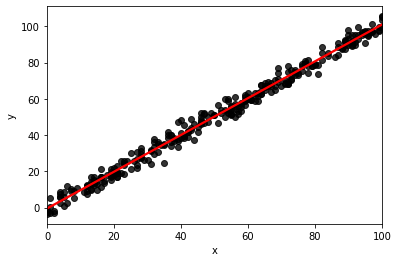

In [35]:
sns.regplot(x='x', y='y', data=df, fit_reg=True, scatter_kws={"color": "black"}, line_kws={"color": "red"})

* Bonus: what was the y-intercept and slope? Use the documentation to find this information out.

In [36]:
y_intercept = reg.predict(y_train.values.reshape(-1,1))
y_intercept

array([[ 1.46654627e+01],
       [ 5.23976436e+01],
       [ 6.87262553e+01],
       [ 1.19187969e+01],
       [ 9.75293890e+01],
       [ 9.70540317e+01],
       [ 9.60702485e+01],
       [ 5.90454552e+01],
       [ 4.77752611e+01],
       [ 9.07507109e+01],
       [ 1.01304556e+01],
       [ 9.65071351e+01],
       [ 9.25671864e+01],
       [ 5.44516481e+01],
       [ 2.65920677e+01],
       [ 6.86719601e+01],
       [ 1.05936736e+01],
       [ 1.18860806e+01],
       [ 1.16982547e+01],
       [ 1.76444038e+01],
       [ 1.90323253e+01],
       [ 4.16698871e+01],
       [ 5.57577403e+01],
       [ 3.62421055e+01],
       [ 7.94916802e+01],
       [ 3.94865835e+01],
       [ 5.04875234e+01],
       [ 4.69608666e+01],
       [ 3.46970586e+01],
       [ 9.37785462e+01],
       [ 9.80861980e+01],
       [ 2.74371086e+01],
       [ 3.29170533e-01],
       [ 3.34703905e+01],
       [ 9.63202888e+01],
       [ 1.53449885e+01],
       [ 4.71876071e+01],
       [ 7.39318587e+00],
       [ 9.6

# Part 3

Using a dataset of your choosing (try kaggle if stuck). Set up and run a linear regression on the data using the steps from Part 2. Don't worry if your results are inconclusive (it happens). Demonstrate that you're able to do it.